In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

data = datasets.load_wine()
wine = pd.DataFrame(data=np.c_[data['data'], data['target']],
columns= data['feature_names'] + ['target'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


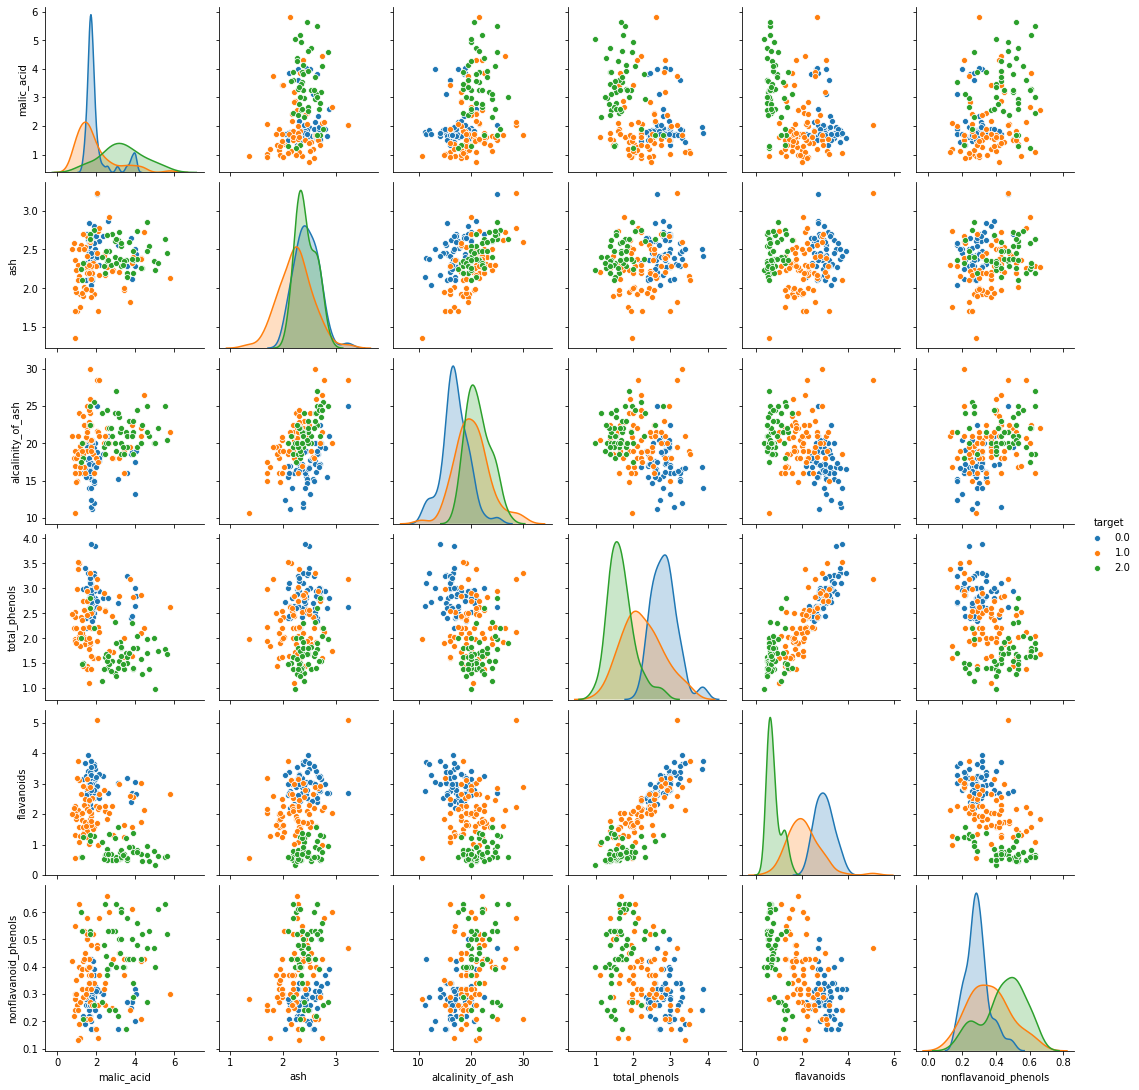

In [5]:
sns.pairplot(wine, vars=["malic_acid", "ash", "alcalinity_of_ash", "total_phenols", "flavanoids",
"nonflavanoid_phenols"], hue='target')


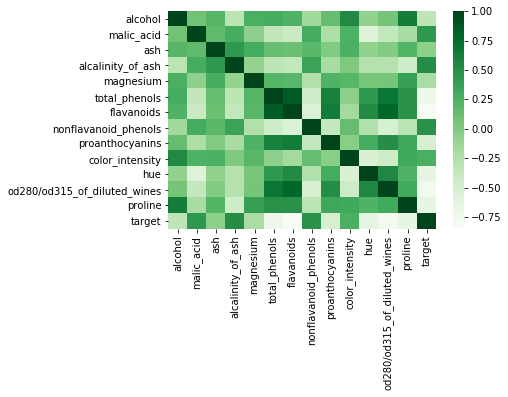

In [6]:
sns.heatmap(wine.corr(), cmap="Greens")

In [7]:
# Removing target from dataframe
y = wine[['target']]
wine.drop('target',axis=1,inplace=True)

In [8]:
# Standard scaling all columns
scaler = StandardScaler()
wine[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]] = scaler.fit_transform(wine[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]])

In [9]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


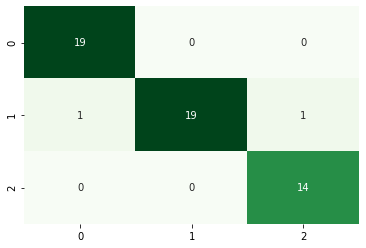

In [10]:
X = wine[['alcohol', 'malic_acid', "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")

In [11]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.90      0.95        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [12]:
best_accuracy = 0
best_err = 0
best_k = 0
accuracies = []
for k in range(30):
    classifier = KNeighborsClassifier(n_neighbors=k+1)
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    accuracy = scores.mean()
    err = scores.std() * 2
    accuracies.append(accuracy) 
    if accuracy > best_accuracy or (accuracy == best_accuracy and err < best_err):
        best_accuracy = accuracy
        best_err = err
        best_k = k+1
    print("K=", k+1, "Acurácia", accuracy, "+-", err)
print("\nO melhor foi K=", best_k, "com acurácia de:", best_accuracy, "+-", best_err)

K= 1 Acurácia 0.9193333333333333 +- 0.08767617185479251
K= 2 Acurácia 0.9273333333333333 +- 0.10636624360095537
K= 3 Acurácia 0.9273333333333333 +- 0.07870055767132643
K= 4 Acurácia 0.9353333333333333 +- 0.08214891627066326
K= 5 Acurácia 0.952 +- 0.07838367176906168
K= 6 Acurácia 0.9273333333333333 +- 0.060280824295772306
K= 7 Acurácia 0.952 +- 0.07838367176906168
K= 8 Acurácia 0.9433333333333334 +- 0.08240819808193303
K= 9 Acurácia 0.9196666666666667 +- 0.04954907780283215
K= 10 Acurácia 0.9273333333333333 +- 0.06028082429577231
K= 11 Acurácia 0.9356666666666665 +- 0.06351202860701093
K= 12 Acurácia 0.9433333333333334 +- 0.040879225911349015
K= 13 Acurácia 0.9433333333333334 +- 0.040879225911349015
K= 14 Acurácia 0.9433333333333334 +- 0.040879225911349015
K= 15 Acurácia 0.9516666666666665 +- 0.03169297153067918
K= 16 Acurácia 0.9516666666666665 +- 0.03169297153067918
K= 17 Acurácia 0.9596666666666666 +- 0.05061400772293946
K= 18 Acurácia 0.9516666666666665 +- 0.03169297153067918
K= 19

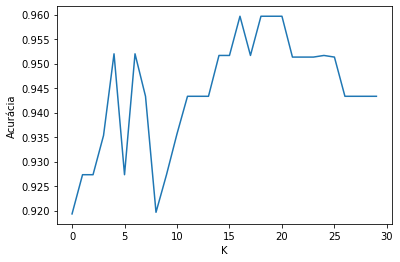

In [13]:
import matplotlib.pyplot as plt
plt.plot(accuracies)
plt.ylabel('Acurácia')
plt.xlabel("K")
plt.show()

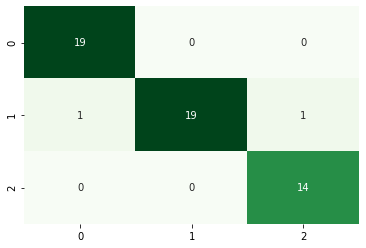

In [14]:
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")

In [15]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.90      0.95        21
         2.0       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [22]:
X_best = wine[['malic_acid', "alcalinity_of_ash", "total_phenols", "flavanoids", "nonflavanoid_phenols", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline" ]]

X_best_train, X_best_test, y_best_train, y_best_test = train_test_split(X_best, y, test_size=0.30, random_state=42)

best_accuracy = 0
best_err = 0
best_k = 0
accuracies = []
for k in range(30):
    classifier = KNeighborsClassifier(n_neighbors=k+1)
    scores = cross_val_score(classifier, X_best_train, y_best_train, cv=5)
    accuracy = scores.mean()
    err = scores.std() * 2
    accuracies.append(accuracy) 
    if accuracy > best_accuracy or (accuracy == best_accuracy and err < best_err):
        best_accuracy = accuracy
        best_err = err
        best_k = k+1
    print("K=", k+1, "Acurácia", accuracy, "+-", err)
print("\nO melhor foi K=", best_k, "com acurácia de:", best_accuracy, "+-", best_err)

K= 1 Acurácia 0.9433333333333334 +- 0.06504699156080249
K= 2 Acurácia 0.9269999999999999 +- 0.06311893535223798
K= 3 Acurácia 0.943 +- 0.08475848040166833
K= 4 Acurácia 0.943 +- 0.08475848040166833
K= 5 Acurácia 0.9676666666666666 +- 0.03235909626536427
K= 6 Acurácia 0.9433333333333334 +- 0.040879225911349015
K= 7 Acurácia 0.9676666666666666 +- 0.03235909626536427
K= 8 Acurácia 0.9596666666666666 +- 0.050614007722939454
K= 9 Acurácia 0.9676666666666666 +- 0.03235909626536427
K= 10 Acurácia 0.9513333333333334 +- 0.06133333333333332
K= 11 Acurácia 0.9433333333333334 +- 0.06504699156080249
K= 12 Acurácia 0.9269999999999999 +- 0.08089499366462673
K= 13 Acurácia 0.9436666666666665 +- 0.06367975432671759
K= 14 Acurácia 0.9269999999999999 +- 0.08089499366462673
K= 15 Acurácia 0.9353333333333333 +- 0.0647181925307285
K= 16 Acurácia 0.9353333333333333 +- 0.0647181925307285
K= 17 Acurácia 0.9513333333333334 +- 0.06133333333333332
K= 18 Acurácia 0.9353333333333333 +- 0.08214891627066326
K= 19 Acu

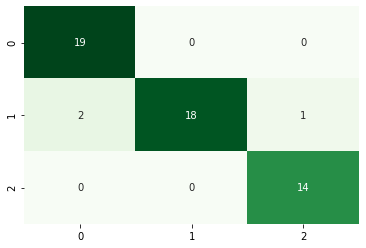

In [25]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_best_train, y_best_train)
y_best_pred = classifier.predict(X_best_test)
cfm = confusion_matrix(y_best_test, y_best_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")